In [3]:
import numpy as np
import math

# 简单的神经网络结构
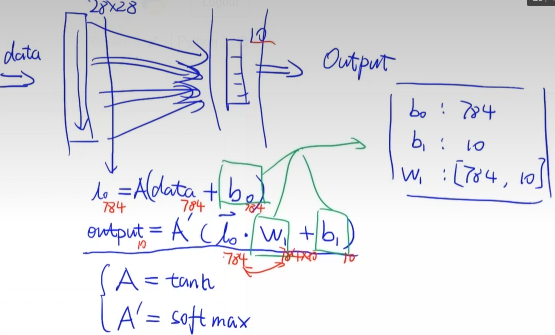
参考视频的link[弱鸡才用tensorflow，强者一个numpy就够：从零开始神经网络第一期_哔哩哔哩_bilibili](https://www.bilibili.com/video/BV1m4411x7KU/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=4029b6d22d1e918089cf8b91446ed3e2)


In [4]:
def tanh(x):
    return np.tanh(x)
def softmax(x_list):
#     剪掉最大值，防止指数计算的时候指数过大，但是整体的值是不变的，因为相当于在上下都除以了一个常数
    exp=np.exp(x_list-x_list.max())
    return exp/exp.sum()

In [18]:
softmax(np.array([1,2,3,4]))

array([0.0320586 , 0.08714432, 0.23688282, 0.64391426])

In [5]:
dimensions=[28*28,10]
activation=[tanh,softmax]
# 确定分布
distribution=[
    {'b':[0,0]},
    {'b':[0,0],'w':[-math.sqrt(6/(dimensions[0]+dimensions[1])),math.sqrt(6/(dimensions[0]+dimensions[1]))]}
]

In [10]:
def init_parameter_b(layer):
    dist = distribution[layer]['b']
#    np.random.rand先生成0-1的随机数，然后再映射到b的分布区间中去
    return np.random.rand(dimensions[layer])*(dist[1]-dist[0])+dist[0]


def init_parameter_w(layer):
    dist = distribution[layer]['w']
#     首先是根据dimension生成一个dismensions[layer-1]*dismension[layer]的矩阵（0，1），然后将这个矩阵映射到其值域上去
# 这种方式要注意第0层是没有w的
    return np.random.rand(dimensions[layer-1],dimensions[layer])*(dist[1]-dist[0])+dist[0]


# 设计函数初始化第0层和第第一层的参数
def init_parameter():
#     和ditrbution一样建立一个表，存每个layer的parameter
    parameter=[]
    for index, i in enumerate(distribution):
        layer_parameter={}
        for j in i.keys():
            if j=='b':
                layer_parameter['b']=init_parameter_b(index)
            if j == 'w':
                layer_parameter['w']=init_parameter_w(index)
        parameter.append(layer_parameter)
    return parameter

In [15]:
# b1是784个0，b2是10个0，w是一个784*10的矩阵
parameter=init_parameter()

In [14]:
def predict(img,parameters):
#     先算f1=input_1*1+b,再算activation(f1)
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
#     先算f2=input_2*w+b,再算activation(f2)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    return l1_out

In [25]:
y=predict(np.random.rand(784),parameter)
print(y,y.shape)

[0.11104159 0.24987203 0.07929257 0.14352582 0.05596181 0.07174989
 0.07790383 0.15163443 0.02606116 0.03295687] (10,)


In [28]:
# 选出y中最大的index
y.argmax()

1

# 第二部分，识别MNIST数据集
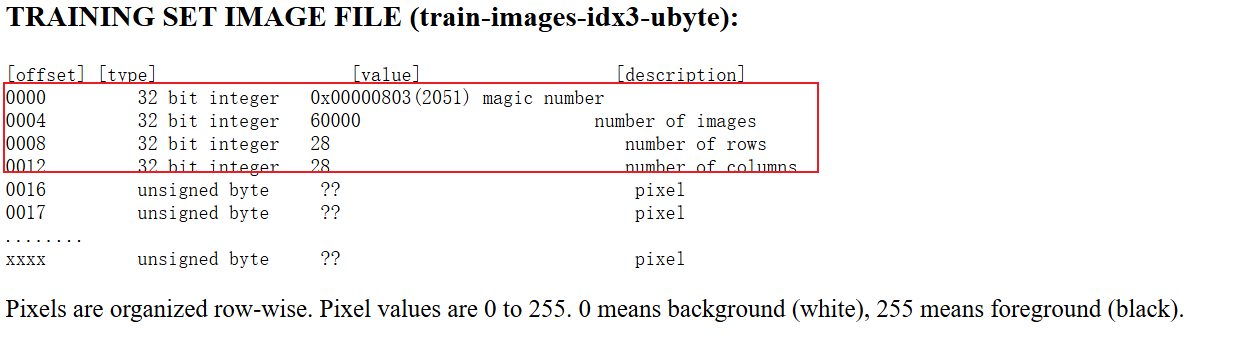
其中前16个字节的数据需要去除，后门每个像素是由一个字节组成

In [29]:
from pathlib import Path

In [30]:
dataset_path=Path('./MNIST/')
train_img_path=dataset_path/'train-images.idx3-ubyte'
train_label_path=dataset_path/'train-labels.idx1-ubyte'
test_img_path=dataset_path/'t10k-images.idx3-ubyte'
test_label_path=dataset_path/'t10k-labels.idx1-ubyte'

In [31]:
train_img_path

PosixPath('MNIST/train-images.idx3-ubyte')

In [32]:
train_f=open(train_img_path,'rb')

In [34]:
train_f

<_io.BufferedReader name='MNIST/train-images.idx3-ubyte'>

In [35]:
import struct

In [38]:
struct.unpack('>4i',train_f.read(16))

(2051, 60000, 28, 28)

In [39]:
np.fromfile(train_f,dtype=np.uint8).reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [68]:
train_num=50000
vaild_num=10000
test_num=10000


# 将train分为vaild数据集和train
with open(train_img_path,'rb') as f:
#     去除前16个字节数值，然后将16字节的数据按照4个数据来解包，每个数据4字节（32 bit integer ）
    struct.unpack('>4i',f.read(16))
#     np.reshape 新的形状，必须与原数组元素总数相同。可以用 -1 表示自动计算该维度大小
#     这里刚好将数据分为了（图片个数，每张图片的pixl值）
    tem_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)
    train_img=tem_img[:train_num]
    vaild_img=tem_img[train_num:]

with open(test_img_path,'rb') as f:
    struct.unpack('>4i',f.read(16))
    test_img=np.fromfile(f,dtype=np.uint8).reshape(-1,28*28)

    
with open(train_label_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    tem_label=np.fromfile(f,dtype=np.uint8)
    train_label=tem_label[:train_num]
    vaild_label=tem_label[train_num:]
    

with open(test_label_path,'rb') as f:
    struct.unpack('>2i',f.read(8))
    test_label=np.fromfile(f,dtype=np.uint8)

In [50]:
import matplotlib.pyplot as plt

In [53]:
train_img[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [52]:
# 原来读取的是pixl以向量的形式排列的，现在变成矩阵
img = train_img[0].reshape(28,28)

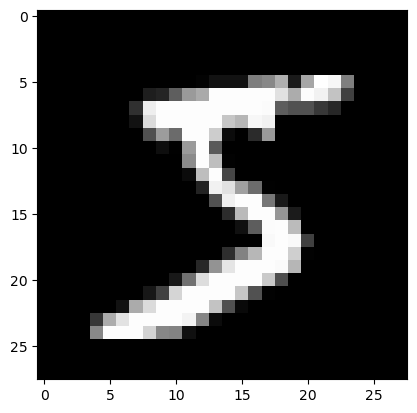

In [56]:
# 直接得到灰度图片
plt.imshow(img,cmap='gray')

In [69]:
def show_train(index):
    plt.imshow(train_img[index].reshape(28,28),cmap='gray')
    print(train_label[index])

def show_test(index):
    plt.imshow(test_img[index].reshape(28,28),cmap='gray')
    print(test_label[index])
    
def show_vaild(index):
    plt.imshow(vaild_img[index].reshape(28,28),cmap='gray')
    print(vaild_label[index])

6


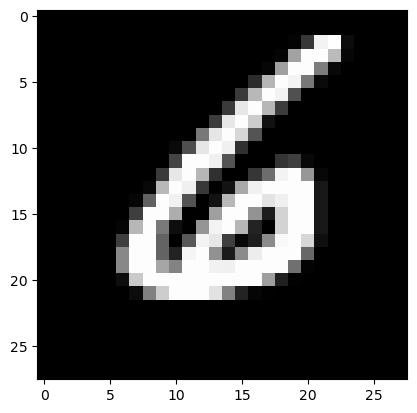

In [91]:
show_vaild(np.random.randint(10000))

In [101]:
def d_softmax(data):
    sm= softmax(data)
#     相当于或得到了一个
    return np.diag(sm)-np.outer(sm,sm)

def d_tanh(data):
    return np.diag(1/(np.cosh(data))**2)

In [104]:
d_softmax(np.array([1,2,3]))

array([[ 0.08192507, -0.02203304, -0.05989202],
       [-0.02203304,  0.18483645, -0.1628034 ],
       [-0.05989202, -0.1628034 ,  0.22269543]])

In [105]:
# 将数据转化为onehot数据，首先生成一个onehot的矩阵
onehot=np.identity(dimensions[-1])
onehot

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [108]:
def sqr_loss(img,label,parameters):
    y_pred=predict(img,parameters)
    y=onehot[label]
    diff=y-y_pred
    return np.dot(diff,diff)

In [109]:
sqr_loss(train_img[0],train_label[0],parameter)

1.0495691867146058

In [ ]:
differential={'softmax':d_softmax,'tanh':d_tanh}

def grad_parameters(img,label,parameters):
#     先算f1=input_1*1+b,再算activation(f1)
    l0_in=img+parameters[0]['b']
    l0_out=activation[0](l0_in)
#     先算f2=input_2*w+b,再算activation(f2)
    l1_in=np.dot(l0_out,parameters[1]['w'])+parameters[1]['b']
    l1_out=activation[1](l1_in)
    diff=onehot[label]-l1_out
#     计算梯度
    grad_b1=-2*np.dot(differential[activation[1]](l1_in),diff)
    grad_w1=-2*np.out(l0_out,differential[activation[1]](diff))
    grad_b0=-2*np.dot(differential[activation[0]](l1_in),differential[activation[0]](diff))
    return l1_out